In [23]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [1]:
with open('acc_usines.txt') as f:
    contents = f.readlines()
    
y = [] # store the number of accidents
for i in contents:
    y.append(int(i[0]))

In [59]:
T = len(y)
# hyperparameters 
a1, a2, d1, d2 = 1, 1, 1, 1
epochs = 100

In [60]:
# initialization
gamma_ = rng.gamma(a1, scale=1/a2)
delta_ = rng.gamma(d1, scale=1/d2)
lambda_ = np.random.choice(range(1, T+1), p=[1/T]*T)

# store the sampling history
l_gamma, l_lambda, l_delta = [gamma_], [lambda_], [delta_]

In [61]:
# Gibbs sampler
for e in range(epochs):
    # define the new parameters for the law of parameter gamma, which follows the law gamma
    shape_gamma_ = sum(y[:lambda_]) + a1 + 1
    rate_gamma_ = 1 / a2 + lambda_
    gamma_ = rng.gamma(shape_gamma_, scale=1/rate_gamma_)
    l_gamma.append(gamma_)

    # define the new parameters for the law of parameter delta, which follows the law gamma
    shape_delta_ = sum(y[lambda_:]) + d1 + 1
    rate_delta_ = 1 / d2 + T - lambda_
    delta_ = rng.gamma(shape_delta_, scale=1/rate_delta_)
    l_delta.append(delta_)

    proba_lambda = [gamma_**(sum(y[:lamb]))*delta_**(sum(y[lamb:]))*np.exp(-(T-lamb)*delta_) for lamb in range(1, T)]
    proba_lambda = proba_lambda / sum(proba_lambda)
    lambda_ = np.random.choice(range(1,T), p=proba_lambda)
    l_lambda.append(lambda_)


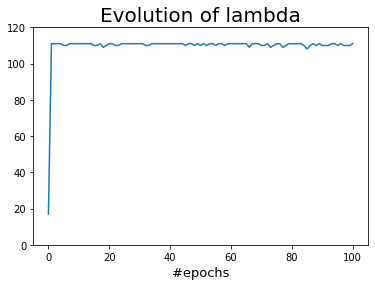

In [62]:
plt.plot(l_lambda)
plt.xlabel("#epochs", size=13)
plt.ylim((0,120))
plt.title("Evolution of lambda", size=20)
plt.show()

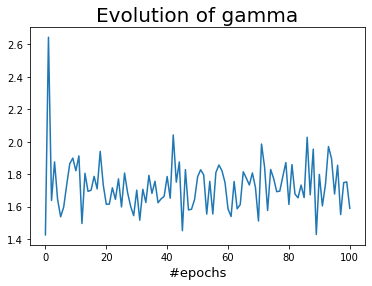

In [63]:
plt.plot(l_gamma)
plt.xlabel("#epochs", size=13)
plt.title("Evolution of gamma", size=20)
plt.show()

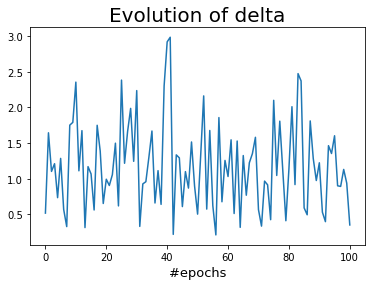

In [64]:
plt.plot(l_delta)
plt.xlabel("#epochs", size=13)
plt.title("Evolution of delta", size=20)
plt.show()